# Supervised Learning, Classification

## Iris Data

The iris dataset contains the following data
- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)

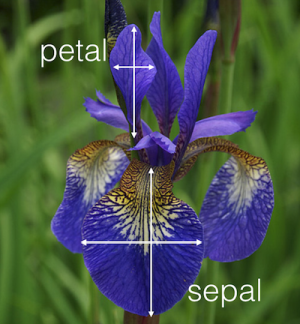

In [4]:
from IPython.display import Image
Image(filename='iris.png')

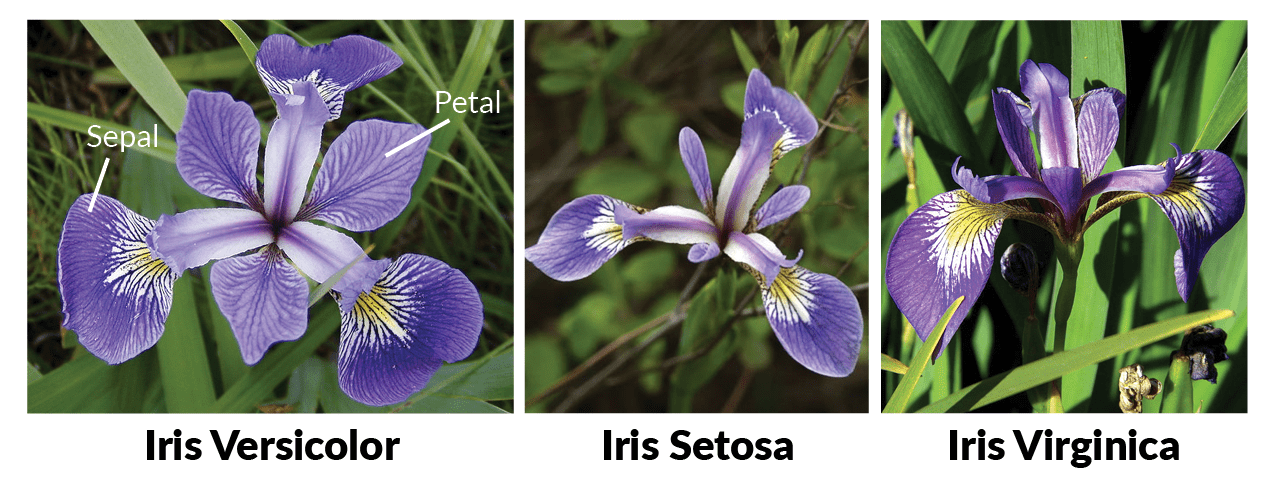

In [5]:
from IPython.display import Image
Image(filename='iris-all.png')

### Packages

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

### Load Data

In [7]:
dataset = load_iris()

### Data Preparation

In [8]:
# Create a Pandas DataFrame for plotting
iris_df = pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
iris_df['Species'] = dataset['target']
iris_df['Species'] = iris_df['Species'].apply(lambda x: dataset['target_names'][x])
# Seperate data and labels for fitting
iris_data = iris_df.iloc[:,:4]
iris_target = iris_df['Species'] 

### Plot Data

In [9]:
iris_df

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


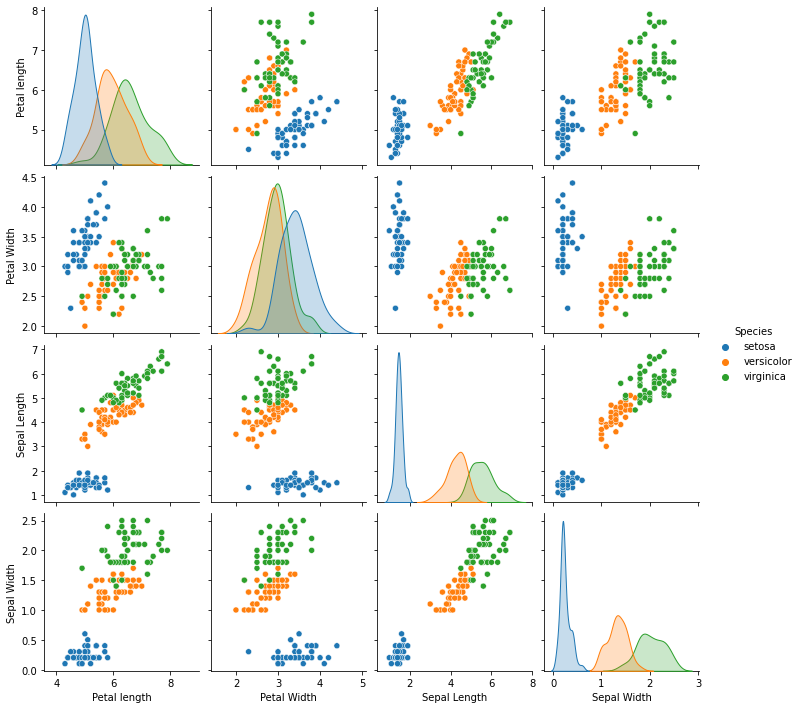

In [10]:
sns_plot = sns.pairplot(iris_df, hue="Species")

## Classification with Decision Trees

### Packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris

### Convenience Functions

In [19]:
def plot_decision_boundaries(clf_):
    """
    Loads the Iris Dataset and fits multiple classifier object from Scikit-Learn to the entire data.
    After fitting the learned decision boundaries are plotted.
    """
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()

    fig, _axs = plt.subplots(nrows=2, ncols=3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs = _axs.flatten()

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf_ = clf_.fit(X, y)

        # Plot the decision boundary
        fig.set_figheight(6)
        fig.set_figwidth(10)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout()

        Z = clf_.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = axs[pairidx].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        axs[pairidx].set_xlabel(iris.feature_names[pair[0]])
        axs[pairidx].set_ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            axs[pairidx].scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.savefig('asd')

In [13]:
def plot_tree_iris(dt_clf):
    """
    Plots the tree of a fitted DecisionTreeClassifier object.
    """
    plt.figure(figsize=(10,10))
    plot_tree(dt_clf,
              filled=True,
              feature_names=['Petal length', 
                             'Petal Width', 
                             'Sepal Length', 
                             'Sepal Width',
                             'Species'],
              class_names=['setosa',
                           'versicolor',
                           'virginica']) 
    plt.show()

### Load Data

In [14]:
iris = load_iris()

### Fitting 1

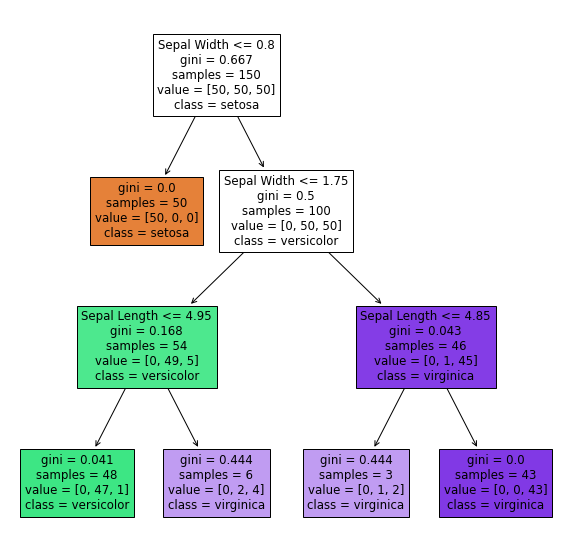

In [15]:
clf = DecisionTreeClassifier(random_state=12, max_depth=3)
clf.fit(iris.data, iris.target)

# Plot Tree
plot_tree_iris(clf)

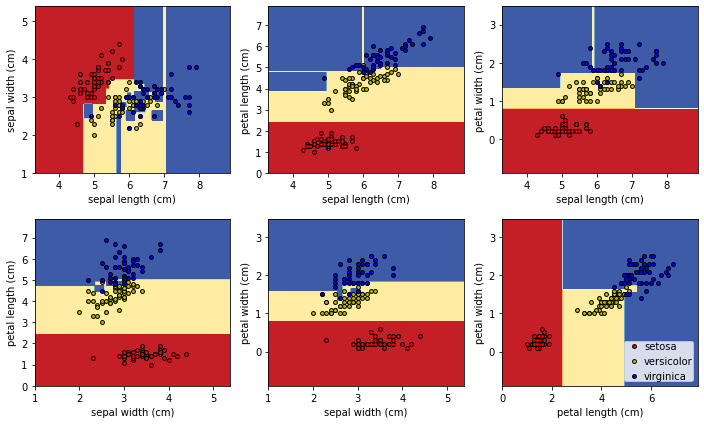

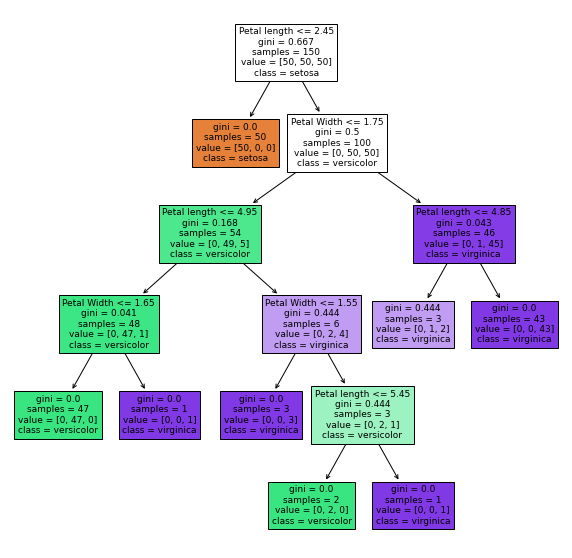

In [16]:
### Play-Zone ###
random_state = 15
max_depth = 1000
### Play-Zone ###

clf = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth)
plot_decision_boundaries(clf)
plot_tree_iris(clf)

## Classification with SVM

### Packages

In [17]:
from sklearn.svm import SVC

### Fitting 1

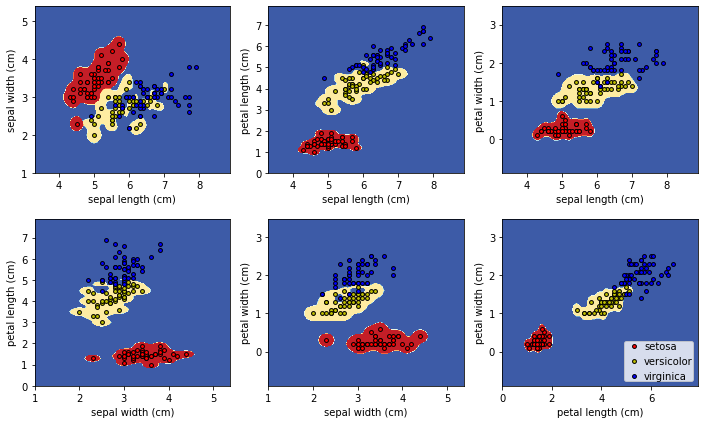

In [20]:
### Play-Zone ###
gamma = 50
C = 10
### Play-Zone ###

rbf_svc = SVC(kernel='rbf', gamma=gamma, C=C)
plot_decision_boundaries(rbf_svc)

### Fitting 2

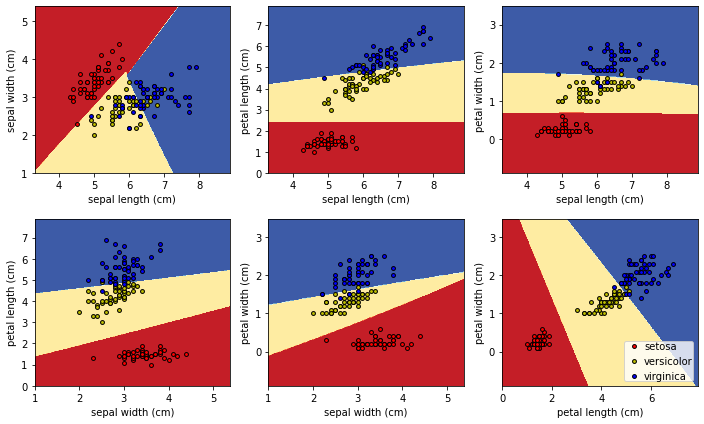

In [33]:
### Play-Zone ###
gamma = 0.01
C = 100
### Play-Zone ###

rbf_svc = SVC(kernel='rbf', gamma=gamma, C=C)
plot_decision_boundaries(rbf_svc)

### Fitting 3

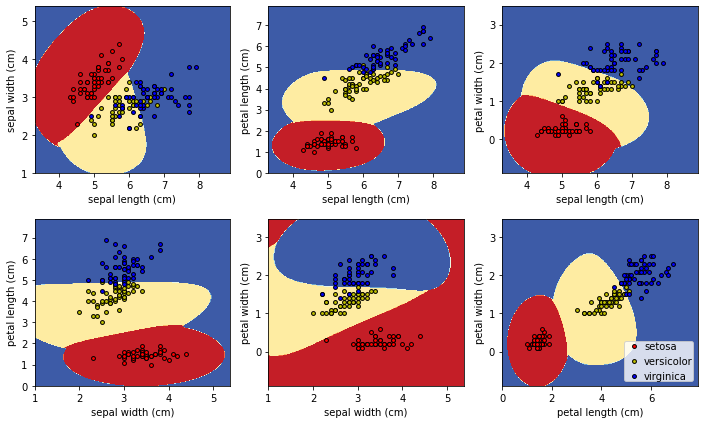

In [29]:
### Play-Zone ###
gamma = 1
C = 0.1
### Play-Zone ###

rbf_svc = SVC(kernel='rbf', gamma=gamma, C=C)
plot_decision_boundaries(rbf_svc)

## Classification with Neural Network

### Packages

In [31]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Convenience Functions

In [32]:
def plot_decision_boundaries_neural_network():
    """
    Loads the Iris Dataset and fits multiple neural networks to the entire data.
    After fitting the learned decision boundaries are plotted.
    """
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()
    # To one-hot-encoded
    _y = utils.to_categorical(iris.target)
    
    fig, _axs = plt.subplots(nrows=2, ncols=3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs = _axs.flatten()

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        _X = iris.data[:, pair]
        n_classes = 3
        
        # Train
        model = Sequential()
        model.add(Dense(150, input_shape=(2,)))
        model.add(Dense(n_classes, input_shape=(150,), activation='softmax'))
        model.summary()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(_X, _y, batch_size=32, epochs=100, verbose=False)

        # Plot the decision boundary
        fig.set_figheight(6)
        fig.set_figwidth(10)
        x_min, x_max = _X[:, 0].min() - 1, _X[:, 0].max() + 1
        y_min, y_max = _X[:, 1].min() - 1, _X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout()

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # From one-hot-encoded response to vector
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        cs = axs[pairidx].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        axs[pairidx].set_xlabel(iris.feature_names[pair[0]])
        axs[pairidx].set_ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(iris.target == i)
            axs[pairidx].scatter(_X[idx, 0], _X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

### Load Data

In [33]:
iris = load_iris()

### Preprocessing

In [34]:
# To one-hot-encoded
y = utils.to_categorical(iris.target)

### Fitting 1

In [35]:
number_of_epochs = 100
batch_size = 64

dimension_input = iris.data.shape[1]
n_classes = 3

# Build a shallow neuronal network
model = Sequential()
model.add(Dense(150, input_shape=(4,)))
model.add(Dense(n_classes, input_shape=(150,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(iris_data,
                y,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               750       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 453       
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 973us/step - loss: 2.1738 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 1.4639 - accuracy: 0.3400
Epoch 3/100
3/3 [==============================] - 0s 535us/step - loss: 1.1146 - accuracy: 0.5067
Epoch 4/100
3/3 [==============================] - 0s 985us/step - loss: 1.0428 - accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 929us/step - loss: 1.0257 - accuracy: 0.3867
Epoch 6/100
3/3 [======

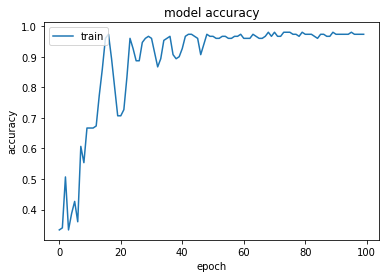

In [36]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Fitting 2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 150)               450       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 453       
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 150)               450       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 453       
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
______________

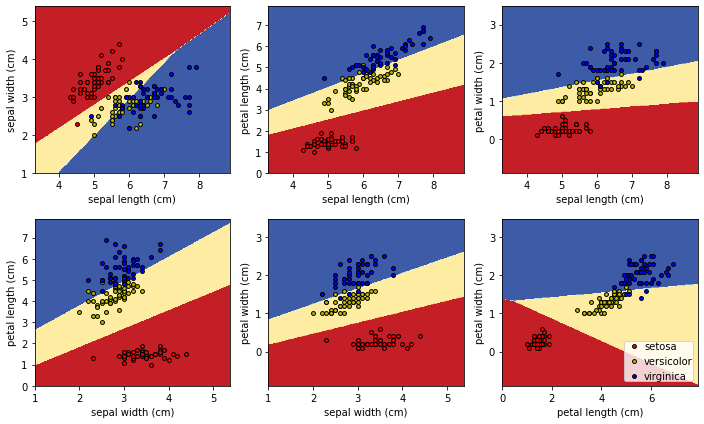

In [37]:
plot_decision_boundaries_neural_network()

## MNIST Dataset

### Packages

In [38]:
from tensorflow.keras.datasets import mnist

### Load Data

In [39]:
# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


### Plotting Data

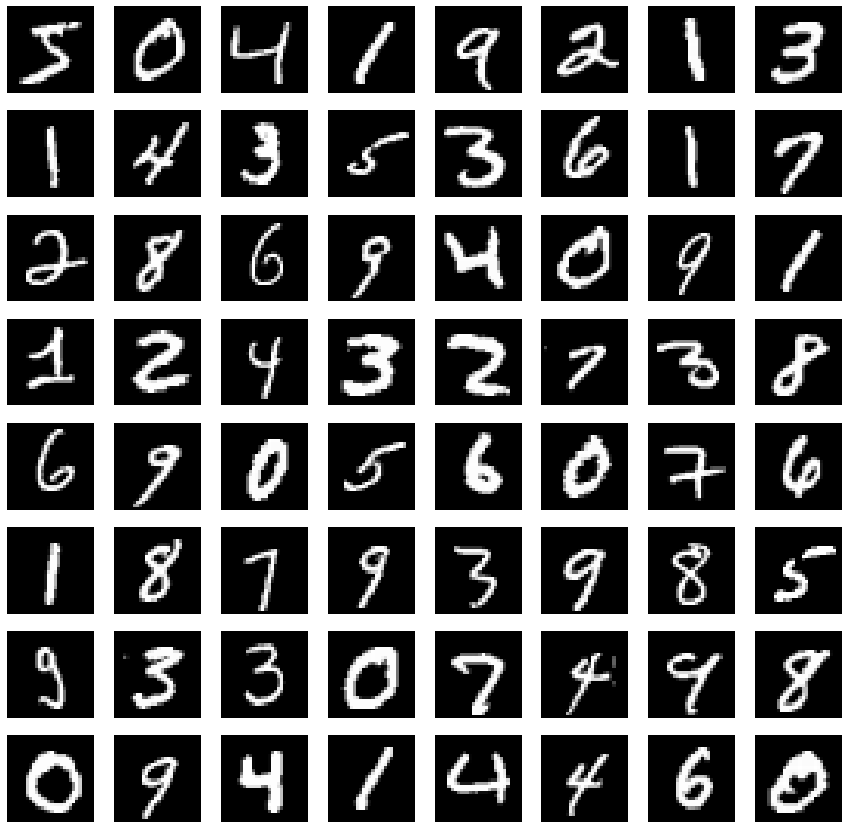

In [40]:
nrow = 8
ncol = 8
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(15)
fig.set_figwidth(15)
axs = _axs.flatten()
for i in range(nrow * ncol):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].axis('off')

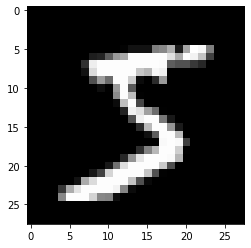

This picture is labelled as number:  5


In [41]:
# Plot the first image from the training data
plt.imshow(X_train[0], cmap='gray')
plt.show()
# Check if the number is correctly labled
print('This picture is labelled as number: ', y_train[0])

## Classification with Neural Network

### Packages

In [42]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Preprocessing

In [43]:
# Preparing Data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize pixel values to [0,1]
X_train /= 255.0
X_test /= 255.0

n_classes = 10

Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

### Fitting 1

In [48]:
number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a shallow neuronal network witch 1500 hidden units
model = Sequential()
model.add(Dense(1500, input_shape=(784,)))
model.add(Dense(n_classes, input_shape=(1500,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_18 (Dense)             (None, 10)                15010     
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3640 - accuracy: 0.8957 - val_loss: 0.2941 - val_accuracy: 0.9182
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3086 - accuracy: 0.9142 - val_loss: 0.3012 - val_accuracy: 0.9193
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2984 - accuracy: 0.9158 - val_loss: 0.2876 - val_accuracy: 0.9226
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2892

### Plot Learning Curve 1

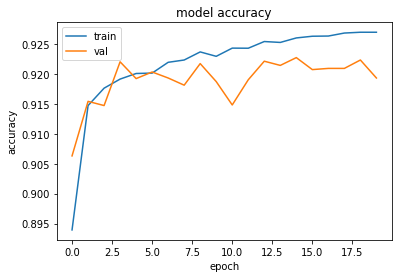

In [45]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Fitting 2

In [46]:
number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a MLP
model = Sequential()
model.add(Dense(n_classes, input_shape=(784,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.8339 - val_loss: 0.3831 - val_accuracy: 0.9034
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.9027 - val_loss: 0.3182 - val_accuracy: 0.9132
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3191 - accuracy: 0.9127 - val_loss: 0.2959 - val_accuracy: 0.9181
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2997 - accuracy: 0.9169 - val_loss: 0.2859 - val_accuracy: 0.9210
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.28

### Plot Learning Curve 1

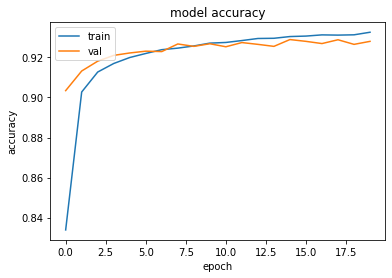

In [47]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()